<a href="https://colab.research.google.com/github/imbiotech/K-PDA_GMP_W-S/blob/main/k_pda_gmp_w_s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#10/06 한국 PDA GMP Workshop 교육 자료 공유

# 서론
---

**지난 10/06 한국 PDA에서 주최한 GMP Workshop에 참석했습니다.**

**최근 AI를 활용한 의약품 제조 및 품질 관리와 관련된 Workshop 이었으며, 그 중 이틀차 Python을 활용한 몇 가지 데이터 분석 실습 관련 세션에 참여하였습니다.**

**최근 업계에서는 "머신 러닝을 활용한 빅 데이터 처리 및 분석" 등으로 이야기 하는 분야로서 우리 회사 내에 얼마나 적용 가능성이 있을 지는 지속적으로 검증이 필요한 부분 중 하나이나, 우선 관련 내용을 공유 드리기 위해 아래와 같이 정리하여 드리니 테스트 해보시고 적용 가능 분야를 같이 고민해 주시면 감사하겠습니다.**

**아래 자료는 해당 세션의 강연자인 강원대 김화종 교수님의 자료를 편집 및 재가공한 것입니다.**

---

# 목차




- 개발 환경 (Development Environment)
  - 콜랩 (Colab)이란?
  - 파이썬 (Python)이란?
  - 쥬피터 노트북 (Jupyter Notebook)이란?

- 머신 러닝 (Machine Learning, ML)
  - 데이터 다루기
  - 데이터 전처리
  - 분석법
  - 분석 모델
    - 회귀 모델
    - 분류 모델
    - 신경망 모델

- 파이썬과 내부 사례 데이터를 활용한 간단한 머신 러닝 프로그램 구현

# 개발 환경 (Development Environment)

## 콜랩 (Colab)이란?
- Colab은 구글에서 지원하는 파이썬을 개발 및 테스트 하기 위한 가상 기기 (Virtual machine)과 쥬피터 노트북
- https://research.google.com/colaboratory/

## 파이썬 (Python)이란?
- 파이썬은 프로그래밍 언어 중 한 종류로 다른 프로그래밍 언어 대비 사용자 친화적인 체계를 가지고 있음
- https://www.python.org/ (별도 설치 불필요)
- 본 자료에서는 파이썬의 판다스 (pandas), 넘파이 (numpy), 맽플롯립 (matplotlib), 사이킷런 (sklearn), 케라스 (keras) 총 5 개 라이브러리를 사용하여 머신 러닝을 구현할 예정

###라이브러리란?
- 각각의 프로그래밍 언어는 기본적으로 지원하는 함수나 기능이 존재함
  - 단순한 사칙 연산부터 좀 더 복잡한 행렬, 함수, 방정식 등의 계산
  - 입력과 출력 등의 하드웨어 관련 기능
  - 시스템에 대한 접근 등의 소프트웨어 관련 기능

  등

- 하지만 기본적인 기능 외에 추가적으로 필요한 기능은 유저들이 직접 구현해야 함
- 특정 영역에 필요한 여러 기능들을 담아놓은 묶음 (모듈, module)을 라이브러리라고 부름
- 다행히도 이 중 상당수가 오픈 소스로 공개되어 있어 무료로 사용 가능하고 인터넷에서 손쉽게 사용법을 찾아볼 수 있으며, 본 교육 자료에서 사용하기 위한 라이브러리 역시 오픈 소스들임

In [46]:
pip install pandas numpy scikit-learn matplotlib lightgbm keras


                                              0.0/1.3 MB ? eta -:--:--
     ------------------                       0.6/1.3 MB 18.8 MB/s eta 0:00:01
     ---------------------------------------- 1.3/1.3 MB 16.7 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## 쥬피터 노트북 (Jupyter Notebook)이란?
- 쥬피터 노트북은 웹 사이트를 기반으로 한 개발 환경.
- 개발을 위한 별도의 프로그램 (Integrated Development Environment, IDE) 설치없이 사용 가능
- 단순 코드의 작성 및 실행 뿐만 아니라 텍스트(Markdown), 그래프(Graph), 그림(Image)과 같은 추가 자료를 첨부할 수 있는 시스템

# 머신 러닝 (Machine Learning, ML)

- 수치를 예측 (회귀) / 카테고리를 예측 (분류) / 최적의 추천 등의 작업을 수행하는 소프트웨어
- 데이터를 통한 학습으로 작업 성능을 개선할 수 있음
- 현재 인공 지능(Artificial Intelligence, AI)을 구현하는 가장 대표적인 방법으로 머신 러닝이 사용되고 있음
- 머신 러닝의 기본 동작은 다음과 같은 체계로 이뤄짐
<img src="https://github.com/imbiotech/K-PDA_GMP_W-S/blob/main/Machine%20Learning%20Flow.png?raw=true" align='left'>







## 데이터 (X)
  - 데이터의 종류
    - 훈련 데이터 (Training Set): 모델을 학습하기 위한 데이터
    - 검증 데이터 (Validation Set): 학습 시킨 모델의 정확도를 검증하기 위한 데이터, 반드시 훈련 데이터와는 다른 데이터여야 함
    - 정형 데이터 (Structured Data): 테이블 형태의 데이터
    - 비정형 데이터 (Unstructured Data): 이미지, 텍스트, 영상, 센서 데이터 등 정형화되어 있지 않은 형태의 데이터
  - 머신 러닝은 학습에 사용하는 데이터가 많으면 많을 수록 예측 및 추천 성능이 향상됨
  - 머신 러닝의 성능을 높이기 위해서는 원시 데이터 (Raw Data)로부터 적절한 학습 및 검증 데이터를 만들기 위한 데이터 전처리 (Data Preprocessing) 과정이 필요함



## 머신러닝 모델
- 입력 데이터 (X)로부터 잘 예측된 정답 (label 또는 target, y)를 얻는 소프트웨어
  - 정답을 잘 예측하기 위해서 각 모델을 구성하는 파라미터의 최적치를 찾아야 함
- 모델에는 다음과 같이 다양한 종류가 있음.
  - 선형 모델
  - 로지스틱 회귀
  - SVM
  - 결정 트리
  - 랜덤 포레스트
  - kNN
  - 베이시언
  - 딥러닝 모델 (MLP, CNN, RNN 등)


## 목적
- 머신 러닝의 목적은 다음 중 하나임.
  - 예측 (Prediction)
    - 회귀 예측 (Regression prediction): 수치를 예측
    - 분류 예측 (Classificaion prediction): 대상의 카테고리를 예측
  - 설명 (Description); 확인 필요
  - 군집화 (Clustering); 확인 필요
  - 추천 (Recommendation); 확인 필요

## 성능 평가
- 작성된 머신 러닝 모델이 원하는 작업을 잘 수행하는지 평가하는 값
- 주요 평가 척도
  - 회귀 모델에서의 R-sqared (R^2)
  - 분류 모델에서의 정확도 (Accuracy), 정밀도 (Precision), 리콜 (Recall), f-1 점수, ROC-AUC 등


## 최적화기
- 학습을 통해 모델 파라미터를 최적의 값으로 수렴시키는 알고리즘
- 일반적으로 경사 하강법 (Gradient descent, GD)이 사용됨



## 손실 함수 (Loss function)
- 최적화기를 통해 손실 함수를 최소화하는 방향을 추구
- 손실 함수를 통해 최적화기의 동작이 잘 이뤄지는지를 평가할 수 있음
- 손실 함수의 종류
  - 회귀 모델에서의 평균 제곱 오차 (Mean square error, MSE)
  - 분류 모델에서의 교차 엔트로피 (Cross entropy, CE)

---
---
---

# 파이썬과 내부 사례 데이터를 활용한 간단한 머신 러닝 프로그램 구현

## 사레 1. A 제품 수율 예측
- 대상 제품 및 공정: A 제품의 a 공정 및 b 공정
- 분석 개요: 공정 중 몇 가지 파라미터 p1, p2... 의 변화에 따른 수율 영향성을 평가하고, 수율을 예측

### 데이터 준비
- 본 케이스 스터디에서 다룰 데이터는 2가지 테이블로 다음과 같음
  - 배치 번호, 공정, 기기 번호, 작업 시간의 데이터를 담은 테이블
  - 계측 시간 및 계측 번호에 따른 계측값 데이터를 담은 테이블
- 데이터는 WMS와 BAS를 통해 추출하였으며, 각 데이터 마다 적절한 1 차 sorting을 통해 불필요한 데이터를 정제한 상태임

- 이 데이터를 pandas 라이브러리에서 제공하는 read_csv() 함수를 사용하여 읽어온 후 분석에 사용할 예정
- pandas의 read_csv() 함수는 csv 파일의 데이터를 읽어와 데이터 프레임 (Dataframe, DF)의 형태로 출력함
  - DF는 행과 열로 구성된 2 차원 테이블 구조의 데이터
  - 엑셀과 비슷한 기능을 수행할 수 있음

#### CSV란?
- 쉼표 (,)로 구분된 데이터 값 (Comma-Separated Values)이 담긴 파일 형식
- 단순한 텍스트 형식의 데이터 값으로 웹 페이지, 메모장, 엑셀 등등 어느 프로그램으로도 읽어올 수 있는 장점이 있음
- 꼭 쉼표가 아니더라도 공백 ( )이나 세로 선 (|) 등 특정 기호로 나눠져 있는 모든 데이터 파일을 의미

### 실행 코드

---
아래에 보이는 각각의 코드 블록은 순차적으로 실행하는 방식

위쪽의 코드 블록을 실행하지 않으면 아래쪽을 실행하는 과정에서 오류가 발생할 수 있음

---

In [2]:
# 훈련 데이터의 URL 주소 설정
process_time_data_address = "https://raw.githubusercontent.com/imbiotech/K-PDA_GMP_W-S/main/process_time_data.csv"
measure_data_address = "https://raw.githubusercontent.com/imbiotech/K-PDA_GMP_W-S/main/measure_data.csv"


# 파이썬 코드의 #은 한 줄 주석문을 나타내는 것으로 각 코드의 설명을 기록하기 위해 작성함
# 여러 줄을 사용하기 위해 '''''' 방식으로 사용하기도 함

In [3]:
# pandas 라이브러리를 가져옴
import pandas


# 데이터 URL에 저장된 데이터를 dataframe 형태로 읽어옴
process_df = pandas.read_csv(process_time_data_address)
measure_df = pandas.read_csv(measure_data_address)


- 파이썬에서는 복잡한 과정 없이 한 줄의 코드를 통해 필요한 라이브러리의 기능을 사용할 수 있음

- 이름이 길어서 pandas를 매번 쓰기 귀찮을 경우 뒤 쪽에 "as pd"를 덧붙이면 pandas 대신 pd만 사용하여도 기능을 사용할 수 있음

    - import pandas as pd

---

- pandas.read_csv()는 pandas 라이브러리 내에 있는 read_csv 함수를 호출하여 사용함
    - read_csv 함수는 괄호 안의 주소 (data_address)에 있는 csv형태의 데이터를 읽어옴

- 이 데이터를 CPU에 "df"라는 이름의 변수로 저장하고 이후에는 df만 호출하면 해당 데이터를 불러올 수 있음



In [4]:
# df에 제대로 된 데이터가 들어왔는지 확인하기 위해 0~2행을 예시 출력
process_df[:3]

,Batch,Process,Equipment,Start_Time,End_Time
0,1,a,R-1107,2021-01-09 11:00,2021-01-09 19:02
1,1,b,R-1107,2021-01-09 19:02,2021-01-10 09:03
2,2,a,R-1108,2021-01-10 13:30,2021-01-10 21:35


In [5]:
measure_df[:3]

,Time,7TBSP,7TBCV,7TA,7TBPV,7P,7S
0,1/1/2021 00:00:00.000,<null>,<null>,<null>,<null>,<null>,<null>
1,1/1/2021 01:19:13.150,19.13,<null>,20.49,19.13,<null>,<null>
2,1/1/2021 03:12:30.472,18.07,<null>,20.49,18.07,<null>,<null>


- df의 자료 이름에 [:3]을 붙이면 3행의 앞까지 (0~2행)을 출력함

In [6]:
# 테이블 정보 확인
process_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Batch       2100 non-null   int64 
 1   Process     2100 non-null   object
 2   Equipment   2100 non-null   object
 3   Start_Time  2100 non-null   object
 4   End_Time    2100 non-null   object
dtypes: int64(1), object(4)
memory usage: 82.2+ KB



- process_df에는 배치 번호 컬럼을 포함한 총 5개의 컬럼이 존재하고, 각 컬럼에 포함된 데이터는 2100개가 존재함

In [7]:
measure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15591 entries, 0 to 15590
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Time    15591 non-null  object
 1   7TBSP   15591 non-null  object
 2   7TBCV   15591 non-null  object
 3   7TA     15591 non-null  object
 4   7TBPV   15591 non-null  object
 5   7P      15591 non-null  object
 6   7S      15591 non-null  object
dtypes: object(7)
memory usage: 852.8+ KB



- measure_df에는 시간 컬럼을 포함한 총 7개의 컬럼이 존재하고, 각 컬럼에 포함된 데이터는 n개가 존재함

- 기본적으로 raw data를 처음 불러 왔을 때 정제 과정을 거친 상태가 아니라면 실제 머신 러닝 모델 구현 시 정확도를 떨어지게 하는 데이터들이 존재할 수 있음

- 이를 실제로 사용하기 위해서는 데이터 전처리 (Data Preprocessing) 과정을 거칠 필요가 있음

In [8]:
# 문자형 숫자 데이터를 숫자형으로 전환하기 위한 함수
def StringToInt(x: str):
    # 결측값인 <null>을 제외한 나머지 문자형 데이터를 숫자형으로 전환함
    if x != "<null>":
        return float(x)

# 온도 관련 데이터를 Celcius에서 Kelvin으로 전환하기 위한 함수
def CelciusToKelvin(x: float):
    return x+273.15


# 일시 관련 데이터를 양식 통일하기 위한 함수 및 해당 함수를 위해 datetime 라이브러리를 불러옴
from datetime import datetime
def StringToDate(x: str):
    if type(x) == str:
        if "/" in x:
            return datetime.strptime(x, "%m/%d/%Y %H:%M:%S.%f").strftime("%Y-%m-%d %H:%M:%S")
        else:
            return datetime.strptime(x, "%Y-%m-%d %H:%M").strftime("%Y-%m-%d %H:%M:%S")

In [9]:
# process_df 테이블 업데이트

columns = process_df.columns

for values in columns:
    if "Time" in values:
        process_df[values] = process_df[values].apply(StringToDate)

process_df

,Batch,Process,Equipment,Start_Time,End_Time
0,1,a,R-1107,2021-01-09 11:00:00,2021-01-09 19:02:00
1,1,b,R-1107,2021-01-09 19:02:00,2021-01-10 09:03:00
2,2,a,R-1108,2021-01-10 13:30:00,2021-01-10 21:35:00
3,2,b,R-1108,2021-01-10 21:35:00,2021-01-11 10:30:00
4,3,a,R-1107,2021-01-11 21:19:00,2021-01-12 05:16:00
...,...,...,...,...,...
2095,1048,b,R-1107,2023-10-14 14:30:00,2023-10-15 04:00:00
2096,1049,a,R-1108,2023-10-15 07:30:00,2023-10-15 15:30:00
2097,1049,b,R-1108,2023-10-15 15:30:00,2023-10-16 08:00:00
2098,1050,a,R-1107,2023-10-16 06:30:00,2023-10-16 14:31:00


In [10]:
# measure_df 테이블 업데이트

columns = measure_df.columns

for values in columns:
    if "Time" in values:
        measure_df[values] = measure_df[values].apply(StringToDate)
        continue
    measure_df[values] = measure_df[values].apply(StringToInt)
    if "T" in values:
        measure_df[values] = measure_df[values].apply(CelciusToKelvin)

measure_df

,Time,7TBSP,7TBCV,7TA,7TBPV,7P,7S
0,2021-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-01 01:19:13,292.28,NaN,293.64,292.28,NaN,NaN
2,2021-01-01 03:12:30,291.22,NaN,293.64,291.22,NaN,NaN
3,2021-01-01 03:12:34,291.22,NaN,289.02,291.22,NaN,NaN
4,2021-01-01 03:15:24,291.22,NaN,279.92,291.22,NaN,NaN
...,...,...,...,...,...,...,...
15586,2021-02-28 18:42:29,293.15,279.07,296.28,292.40,0.69,60.05
15587,2021-02-28 18:58:21,293.15,280.19,296.28,292.40,0.69,60.05
15588,2021-02-28 19:04:57,293.15,279.05,296.28,292.40,0.69,60.05
15589,2021-02-28 19:05:26,293.15,279.05,295.25,292.40,0.69,60.05


In [11]:
def FindingDateDiff(x: str, y: str, z: int):
    X = datetime.strptime(x,"%Y-%m-%d %H:%M:%S")
    Y = datetime.strptime(process_df[y][z],"%Y-%m-%d %H:%M:%S")
    return (X-Y).days

measure_df2 = measure_df.copy()
measure_df3 = measure_df.copy()


# 시작 시간의 맨 첫 번째 데이터 확인
measure_df2["Time"]=measure_df2["Time"].apply(FindingDateDiff, args=("Start_Time",0))
StartIndex = measure_df2[measure_df2["Time"]>=0].index[0] 


measure_df3["Time"]=measure_df3["Time"].apply(FindingDateDiff, args=("End_Time",0))
EndIndex = measure_df3[measure_df3["Time"]>=0].index[0]

measure_df[StartIndex:EndIndex+1]





,Time,7TBSP,7TBCV,7TA,7TBPV,7P,7S
1431,2021-01-09 11:00:21,318.15,303.06,333.55,332.54,0.11,60.05
1432,2021-01-09 11:01:25,318.15,299.77,333.55,332.54,0.11,60.05
1433,2021-01-09 11:03:08,318.15,299.77,333.55,328.22,0.11,60.05
1434,2021-01-09 11:03:15,318.15,301.93,333.55,328.22,0.11,60.05
1435,2021-01-09 11:05:26,318.15,301.93,333.55,326.23,0.11,60.05
...,...,...,...,...,...,...,...
1597,2021-01-09 18:58:55,287.51,317.19,296.54,286.37,1.50,60.04
1598,2021-01-09 18:58:56,287.51,273.15,296.54,286.37,1.50,60.04
1599,2021-01-09 18:59:06,287.51,373.15,296.54,286.37,1.50,60.04
1600,2021-01-09 19:01:45,290.33,373.15,296.54,290.33,1.50,60.04


---
---
---

## 사례 2. B 제품 수율 예측
- 대상 제품 및 공정: B 제품의 a 공정 및 b 공정
- 분석 개요: 공정 중 몇 가지 파라미터 p1, p2... 의 변화에 따른 수율 영향성을 평가하고, 수율을 예측

### 데이터 준비
- 본 케이스 스터디에서 다룰 데이터는 2가지 테이블로 다음과 같음
  - 배치 번호, 공정, 기기 번호, 작업 시간의 데이터를 담은 테이블
  - 계측 시간 및 계측 번호에 따른 계측값 데이터를 담은 테이블
- 데이터는 WMS와 BAS를 통해 추출하였으며, 각 데이터 마다 적절한 1 차 sorting을 통해 불필요한 데이터를 정제한 상태임

- 이 데이터를 pandas 라이브러리에서 제공하는 read_csv() 함수를 사용하여 읽어온 후 분석에 사용할 예정
- pandas의 read_csv() 함수는 csv 파일의 데이터를 읽어와 데이터 프레임 (Dataframe, DF)의 형태로 출력함
  - DF는 행과 열로 구성된 2 차원 테이블 구조의 데이터
  - 엑셀과 비슷한 기능을 수행할 수 있음

### 실행 코드

---
아래에 보이는 각각의 코드 블록은 순차적으로 실행하는 방식

위쪽의 코드 블록을 실행하지 않으면 아래쪽을 실행하는 과정에서 오류가 발생할 수 있음

---

In [12]:
# pandas를 pd라는 이름으로 불러옴
import pandas as pd

# ipc_data의 주소 설정 및 ipc_df라는 이름으로 변수 선언
ipc_data_address = "https://raw.githubusercontent.com/imbiotech/K-PDA_GMP_W-S/main/ipc_data.csv"
ipc_df = pd.read_csv(ipc_data_address)

# 데이터 확인
ipc_df[:3]

,batch,Exp,Real,p1,p2,p3,p4,p5,p6
0,21-09-001,366.49,318.01,0.9869,0.9475,0.0314,0.9299,0.0143,0.8136
1,21-09-004,545.41,462.90,0.9869,0.9814,0.0380,0.9659,0.0038,0.8703
2,21-09-005,549.49,507.34,0.9940,0.9805,0.0380,0.9730,0.0045,0.8715


In [13]:
# Real Column과 Exp Column을 사용하여 Real Column 생성 후 기존 데이터 삭제
ipc_df["Result"] = round(ipc_df["Real"]/ipc_df["Exp"]*100,2)
ipc_df.drop(["Exp","Real"],axis=1,inplace=True)


# Training Set과 Validation Set을 분리
ipc_df_trn = ipc_df[:112]
ipc_df_val = ipc_df[112:]

In [14]:
# Training Set 데이터 확인
ipc_df_trn[:3]

,batch,p1,p2,p3,p4,p5,p6,Result
0,21-09-001,0.9869,0.9475,0.0314,0.9299,0.0143,0.8136,86.77
1,21-09-004,0.9869,0.9814,0.0380,0.9659,0.0038,0.8703,84.87
2,21-09-005,0.9940,0.9805,0.0380,0.9730,0.0045,0.8715,92.33


In [15]:
# Validation Set 데이터 확인
ipc_df_val[:3]

,batch,p1,p2,p3,p4,p5,p6,Result
112,23-24-001,1.0,0.9778,0.0390,0.9771,0.0014,0.8705,92.44
113,23-24-002,1.0,0.9818,0.0390,0.9818,0.0013,0.8735,91.50
114,23-24-003,1.0,0.9810,0.0382,0.9810,0.0010,0.8677,92.83


In [16]:
# 데이터 (x) 컬럼 지정
features = ipc_df_trn.columns[1:7]


# 타겟 (y)과 데이터 (x) 사이의 상관 계수 확인
ipc_df_trn[features].corrwith(ipc_df_trn["Result"]).sort_values(ascending=True).round(2)

p5   -0.71
p1    0.09
p3    0.38
p6    0.55
p2    0.60
p4    0.67
dtype: float64

* Correlation의 절대값이 0에 가까울 수록 상관도가 없는 값
* Correlation의 절대값이 1에 가까울 수록 상관도가 높은 값

C:\Users\지민섭\AppData\Local\Temp\ipykernel_15236\1685988090.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipc_df_trn.sort_index(ascending=True,inplace=True)


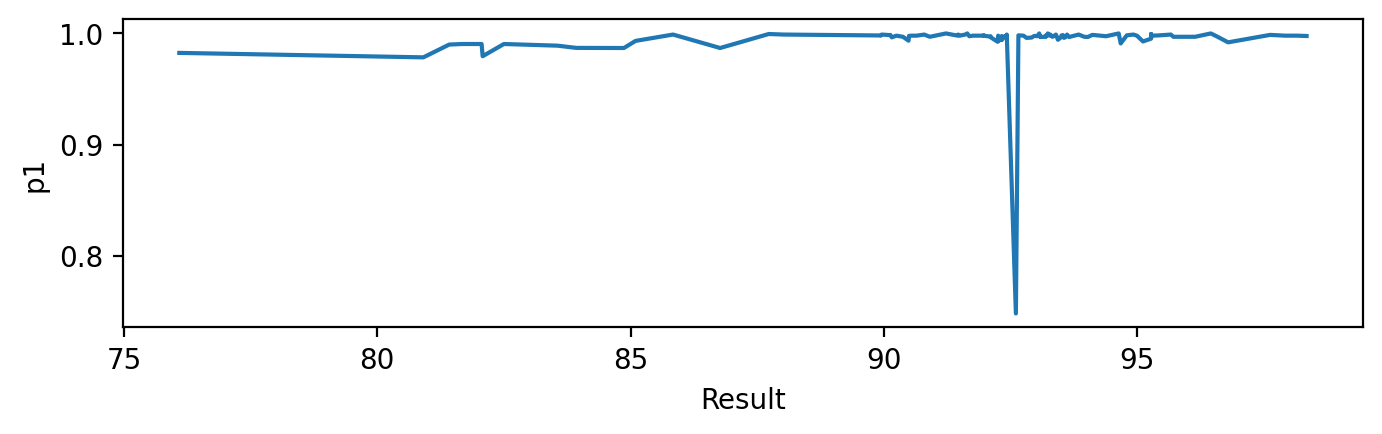

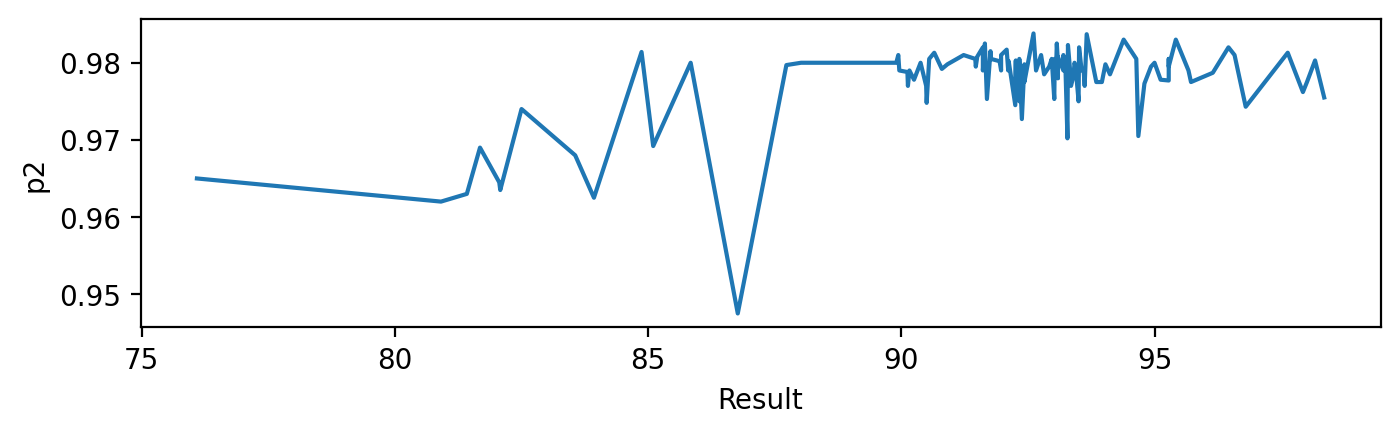

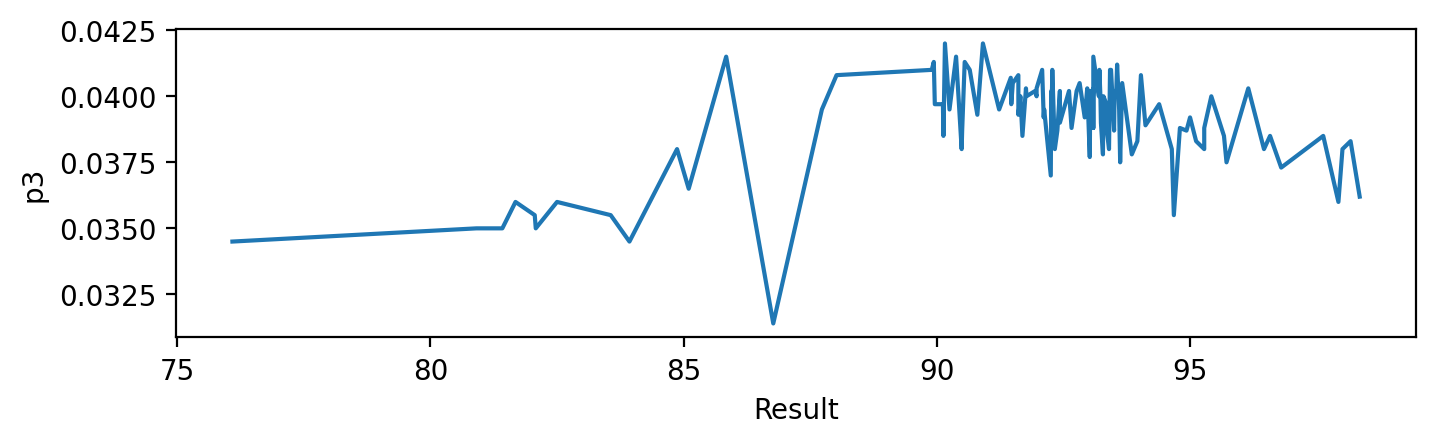

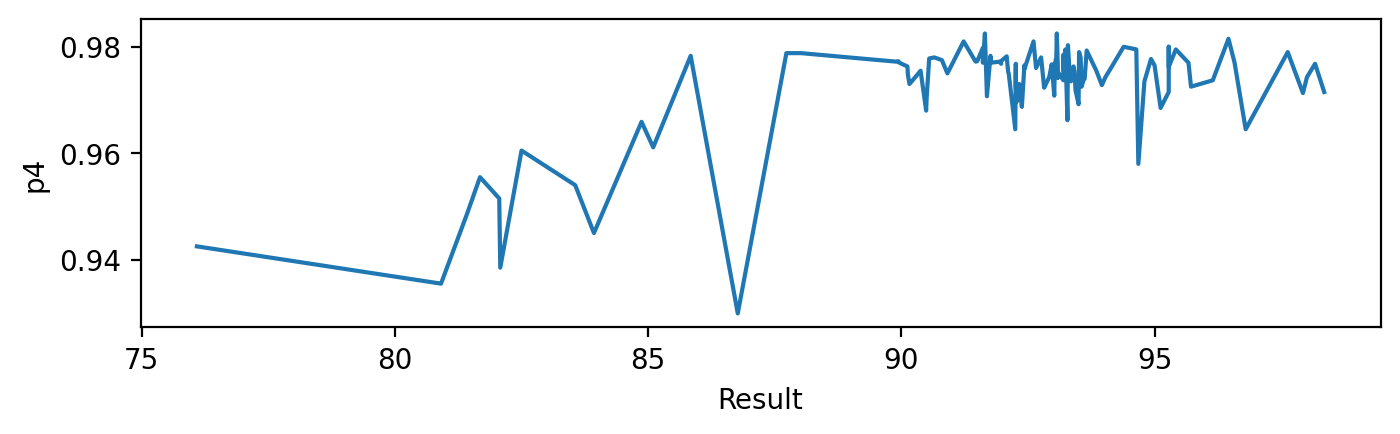

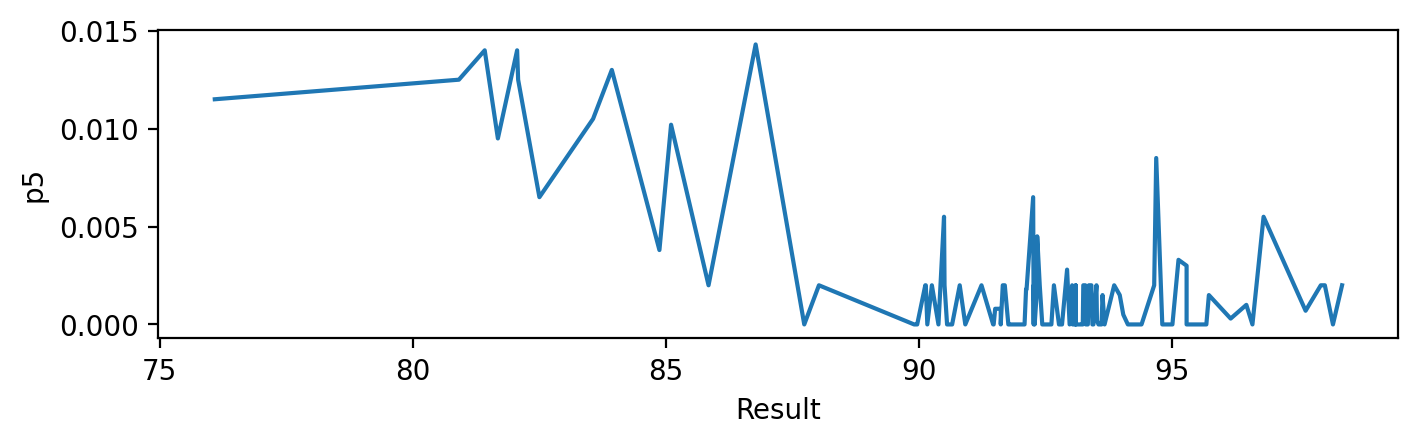

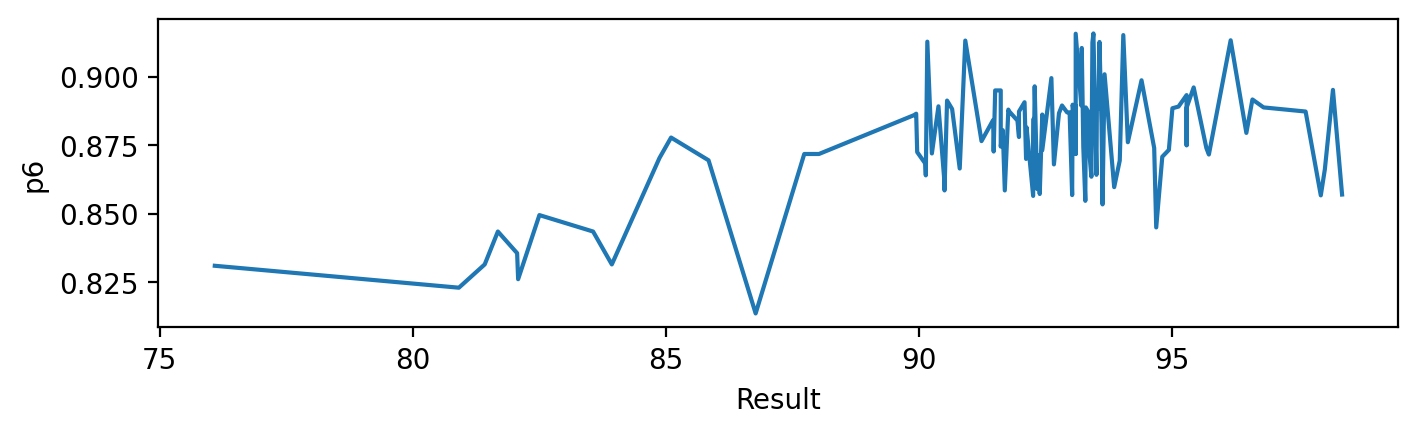

In [17]:
# 시각화
import matplotlib.pyplot as plt


# 레티나 디스플레이를 사용하는 경우 고화질로 출력해준다
%config InlineBackend.figure_format = 'retina'


# Result의 순서대로 나열하기 위해 Result를 Dataframe의 index로 설정
if ipc_df_trn.index.name != "Result":
    ipc_df_trn.set_index("Result",inplace=True)
    ipc_df_trn.sort_index(ascending=True,inplace=True)


# 각 데이터 (x) vs 타겟 (y) 에 대한 그래프 작성
for f in features:
    plt.figure(figsize=(8, 2))
    ipc_df_trn[f].plot()
    plt.ylabel(f)
    plt.show()

#### 데이터 전처리
- ML 모델 구현을 위해 원시 데이터를 그대로 사용할 경우 원하는 모델을 구현할 수 없거나, 구현하더라도 정확도가 떨어질 수 있음
- 이러한 오류를 방지하기 위해 데이터의 정제 과정이 필요하고 이러한 과정을 데이터 전처리라고 부름
- 데이터를 처리하는 방법에는 다음과 같은 것들이 존재함
    - 데이터 클리닝 (Data Cleaning)
    - 이상치 처리 (Outlier)
    - 데이터 변환 (Data Transformation)
    - 스케일링 (Scaling)

##### 데이터 클리닝
- 데이터가 없거나 (결측치, Missing value) 틀린 값 (Error)이 포함되어 있는 데이터를 처리하는 방법
- 다음 세 가지 방법 중에서 선택하여 처리
    - 해당 값이 포함된 샘플을 버린다.
    - 해당 값을 적절한 값으로 대체한다.
    - 해당 값을 그대로 두고 다음 분석 단계에서 처리한다.

##### 이상치 처리
- 이상치 (Outlier)는 데이터의 경향성에서 벗어나있는 데이터를 의미함
- 이상치를 제거하여 데이터 분석의 정확도를 높일 수 있음
- 이상치 탐지 방법
    - 단변수 일 때
        - 표준 편차가 n 이상인 값을 처리한다. (n의 값은 분석하는 사람이 적절히 정한다.)
        - 실제 데이터를 통해 이상치를 파악한다.
    - 다변수 일 때
        - 주성분 분석 (Pricipal Component Analysis, PCA)을 통해 찾는다.

* 각 plot graph를 확인했을 때 이상치들이 존재하고 있으며 데이터 클리닝을 위해 해당 이상치 데이터를 버림


<img src="https://github.com/imbiotech/K-PDA_GMP_W-S/blob/main/Outlier.png?raw=true" align='left'>

In [18]:
# 이상치를 제외하기 위한 index 찾기
outlier_index=[]

for f in features:
    if f != "p5":
        index = ipc_df.loc[ipc_df[f]==ipc_df[f].min()].index[0]
        outlier_index.append(index) # 0 행과 67 행


# 해당하는 행 데이터 삭제
ipc_df.drop(index=list(set(outlier_index)),inplace=True)
ipc_df[:3]

,batch,p1,p2,p3,p4,p5,p6,Result
1,21-09-004,0.9869,0.9814,0.038,0.9659,0.0038,0.8703,84.87
2,21-09-005,0.9940,0.9805,0.038,0.9730,0.0045,0.8715,92.33
3,21-09-006,0.9935,0.9770,0.038,0.9680,0.0055,0.8635,90.49


* 첫 행의 데이터가 21-09-001 배치 였다가 지금은 21-09-004 배치로 바뀜

In [19]:
# Training Set과 Validation Set을 다시 분리
ipc_df_trn = ipc_df[:110]
ipc_df_val = ipc_df[110:]


# 상관 수치 재분석
ipc_df_trn[features].corrwith(ipc_df_trn["Result"]).sort_values(ascending=True).round(2)

p5   -0.71
p3    0.37
p6    0.55
p2    0.64
p1    0.68
p4    0.69
dtype: float64

- 이상치 제거 전 데이터의 상관 관계 수치는 아래와 같았으나 p1의 상관 수치가 늘어난 것을 확인할 수 있음
- 현재 존재하는 데이터 중 버릴 데이터가 크게 보이지 않으므로 그대로 진행

▼ 기존 데이터

<img src="https://github.com/imbiotech/K-PDA_GMP_W-S/blob/main/Correlation_Original.png?raw=true" align='left'>

##### 데이터 변환 (Data Transformation)
- 데이터의 상관 관계를 명확히 하기 위해서 데이터를 특정 형태로 변환하여 분석하는 방법
- 다음과 같은 변환을 사용함
    - 카테고리 인코딩: 하나의 숫자로 표현되어 있지 않은 데이터를 하나의 숫자로 변환하여 분석하는 방법
        - 원 핫 인코딩: 국적, 성별, 계절 등 카테고리를 구분하는 변수를 변환하는 방법
            - 예를 들어 봄은 1, 여름은 2, 가을은 3, 겨울은 4로 변환하여 분석
        - 연령대, 옷 사이즈 등 연속형 변수를 카테고리 인코딩 할 수도 있음
            - 10 대는 1, 20 대는 2, 30 대는 3 등
    - 로그 변환: x 대신 log(x)를 사용
    - 역수 변환: x 대신 1/x를 사용
    - 다차항 변환 (Polynomial trnansformation): x 대신 x^2 이나 x*y를 사용
    - 비율값 사용: x 대신 x/y를 사용
    - 새로운 값 정의: 특정 값 체계를 만들어서 변환
        - BMI = 몸무게 / 키**2

##### 스케일링 (Scaling)
- 여러 변수의 범위가 서로 다른 경우 분석에서 동일한 비중으로 반영하기 위해서는 동일한 범위를 갖도록 변환해야 함
    - Scaling 과정을 거치지 않을 경우에는 데이터 가중치 측면에서 수치가 작은 변수는 과대평가되고 수치가 큰 변수는 과소평가되는 현상이 발생함
- 다양한 스케일링 방식이 존재하며 일반적으로 평균을 0, 표준 편차가 1이 되도록 변환하는 표준 스케일링 (Standard Scaling)을 가장 많이 사용함
- 값의 최소치와 최대치가 정해진 경우는 최소치를 0, 최대치를 1로 변환하는 min-max Scaling도 자주 사용함

In [20]:
# Standard Scaling을 위한 모듈 호출
from sklearn.preprocessing import StandardScaler
S_Scaler = StandardScaler()


# Scaling 전 Training Set 확인
print(ipc_df_trn[features][:3])


# Scaling 및 Scaling 후 Training Set 확인
ipc_df_trn[features] = S_Scaler.fit_transform(ipc_df_trn[features])
print(ipc_df_trn[features][:3])


# 줄 간격 조절을 위한 더미
print("""

""")

       p1      p2     p3      p4      p5      p6
1  0.9869  0.9814  0.038  0.9659  0.0038  0.8703
2  0.9940  0.9805  0.038  0.9730  0.0045  0.8715
3  0.9935  0.9770  0.038  0.9680  0.0055  0.8635
         p1        p2        p3        p4        p5        p6
1 -2.520077  0.770391 -0.604969 -0.786621  0.520706 -0.355430
2 -0.667672  0.571878 -0.604969  0.023334  0.727912 -0.294790
3 -0.798123 -0.200117 -0.604969 -0.547057  1.023920 -0.699053





C:\Users\지민섭\AppData\Local\Temp\ipykernel_15236\283006238.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipc_df_trn[features] = S_Scaler.fit_transform(ipc_df_trn[features])


- StandardScaler 모듈의 fit_transfer / fit / transfer함수를 사용하면 다음과 같은 작업이 진행됨
    - fit: 각 컬럼의 데이터를 토대로 평균과 분산을 구하고 저장함
    - transfer: 각 컬럼의 평균과 분산 데이터를 통해 데이터를 Standard Scaling 함

In [21]:
# Scaling 전 Validation Set 확인
print(ipc_df_val[features][:3])


# Scaling 및 Scaling 후 Validation Set 확인
ipc_df_val[features] = S_Scaler.transform(ipc_df_val[features])
print(ipc_df_val[features][:3])


# 줄 간격 조절을 위한 더미
print("""

""")

      p1      p2      p3      p4      p5      p6
112  1.0  0.9778  0.0390  0.9771  0.0014  0.8705
113  1.0  0.9818  0.0390  0.9818  0.0013  0.8735
114  1.0  0.9810  0.0382  0.9810  0.0010  0.8677
          p1        p2        p3        p4        p5        p6
112  0.89774 -0.023661 -0.024789  0.491055 -0.189715 -0.345323
113  0.89774  0.858619 -0.024789  1.027222 -0.219315 -0.193725
114  0.89774  0.682163 -0.488933  0.935959 -0.308118 -0.486815





C:\Users\지민섭\AppData\Local\Temp\ipykernel_15236\1169904893.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipc_df_val[features] = S_Scaler.transform(ipc_df_val[features])


- 검증 과정에서는 다음과 같은 절차를 진행
    1. Training Set의 p1~p6 (X_train)와 Result (y_train)사이의 관계를 통해 ML Model의 훈련을 진행한다.
    2. 훈련이 끝난 ML Model을 사용하여 Validation Set의 p1~p6 (X_val) 데이터로부터 예측 결과 (y_pred)를 추출한다.
    3. Validation Set의 실제 결과 (y_val)와 예측 결과 (y_pred)를 사용하여 Model의 정확도를 평가한다.

#### 회귀 모델 (Regression Model)

In [22]:
# 데이터 전처리 완료 및 모델 훈련 시작
# 훈련 데이터 (X_train) 및 훈련 결과 (y_train) 지정
X_train = ipc_df_trn[features]
y_train = ipc_df_trn["Result"]
print(X_train)
print(y_train)

           p1        p2        p3        p4        p5        p6
1   -2.520077  0.770391 -0.604969 -0.786621  0.520706 -0.355430
2   -0.667672  0.571878 -0.604969  0.023334  0.727912 -0.294790
3   -0.798123 -0.200117 -0.604969 -0.547057  1.023920 -0.699053
4   -1.059025 -0.751542 -1.185149 -0.946330  1.319929 -1.052783
5   -1.580829 -0.861827 -1.765329 -1.402643  1.319929 -1.406513
..        ...       ...       ...       ...       ...       ...
107  0.115034  0.417479  1.715750  0.251491 -0.604127  1.812429
108  0.062854  0.417479  1.019534  0.171636 -0.456122  1.913495
109  0.115034  0.174852  0.729444  0.103189 -0.515324  1.817482
110 -0.015417  0.241023  1.715750  0.023334 -0.604127  1.792216
111 -0.145868  0.241023  1.251606 -0.033705 -0.604127  1.787163

[110 rows x 6 columns]
1      84.87
2      92.33
3      90.49
4      92.25
5      82.50
       ...  
107    90.91
108    94.03
109    96.15
110    90.16
111    93.56
Name: Result, Length: 110, dtype: float64


In [23]:
# 테스트 데이터 (X_val) 및 테스트 결과 (y_val)지정
X_val = ipc_df_val[features]
y_val = ipc_df_val["Result"]


# y_val의 index 초기화
y_val.reset_index(drop=True,inplace=True)

In [24]:
# 선형 회귀 함수를 호출하고 lin이라는 변수로 지정
from sklearn.linear_model import LinearRegression
lin = LinearRegression()


# 훈련 데이터 및 결과 (X_train, y_train)를 사용하여 선형 회귀 fitting 진행
lin.fit(X_train,y_train)


# fitting 된 모델에 테스트 데이터 (X_val)를 적용하여 예측 결과 (y_pred) 적용
y_pred = lin.predict(X_val)
y_pred

array([93.04644702, 93.34233401, 94.91222944, 96.60481801, 94.8838448 ,
       93.09455052, 88.64203606, 93.44300486, 92.07226623, 90.46750429,
       92.63570688, 90.24239288, 93.84390857, 94.07050098, 91.33395957,
       92.75854875, 89.96722634, 90.94006896, 92.41557187, 92.73649621,
       91.98936851, 90.06028596, 90.37319974, 93.41632546, 93.45083459,
       92.55000256, 89.71482952])

In [3]:
# 예측 결과 (y_pred)와 테스트 결과 (y_val)을 비교하기 위한 함수 생성
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


# 테스트 결과 (y_val)와 예측 결과 (y_pred)를 사용한 선형 회귀 모델 평가
def show_regression_result(y_val, y_pred, N=100):
    plt.rc('figure', figsize=(6,4)) # 그래프의 사이즈를 6 X 4 로 지정
    error = y_pred - y_val # y_pred와 y_val의 차이를 편차 (error)로 지정
    print("MAE=", mean_absolute_error(y_true=y_val,y_pred=y_pred)) # MAE 계산 및 출력
    print("rmse=", mean_squared_error(y_true=y_val,y_pred=y_pred)**0.5) # RMSE 계산 및 출력
    print("max error=", max(abs(error))) # Max Error 계산 및 출력
    print("R2=",r2_score(y_val, y_pred)) # R-Squared 계산 및 출력

    if N > 0:
      plt.plot(y_val[:N], 'r.-', label='y_val')
      plt.plot(y_pred[:N], 'b.-', label='y_pred')
      plt.legend()
      plt.show()

##### 회귀 모델의 성능 평가
- 선형 회귀를 포함한 회귀 모델의 성능을 평가하는 지표로 다음과 같은 수치들을 확인함
    - R-Sqaured (R2)
        - 회귀 모델의 성능 평가를 위한 기본적인 지표
        - MSE를 분산으로 정규화한 값을 사용
        - 일반적으로 0~1 사이에 분포하며, 1에 가까울 수록 완벽한 예측
        - 음수도 나올 수 있음
    - MAE (Mean Absolute Error, 편차 절대값의 평균)
    - MSE (Mean Squared Error, 편차 제곱의 평균) 
    - RMSE (Root Mean Squared Error, 편차 제곱의 평균의 제곱근)
        - 위 3개 지표는 편차 (= 예측 - 실측)을 평가하는 지표
        - 편차의 음수/양수 분포로 인한 상쇄 영향을 줄이기 위해 절대값 (MAE) 또는 제곱 (MSE)을 사용하거나, 다시 제곱으로 인한 과대평가 가능성을 줄이기 위해 제곱근을 적용한 지표 (RMSE)

MAE= 1.7945538923703364
rmse= 2.163011647024809
max error= 5.7239595658952
R2= 0.02279233031680883


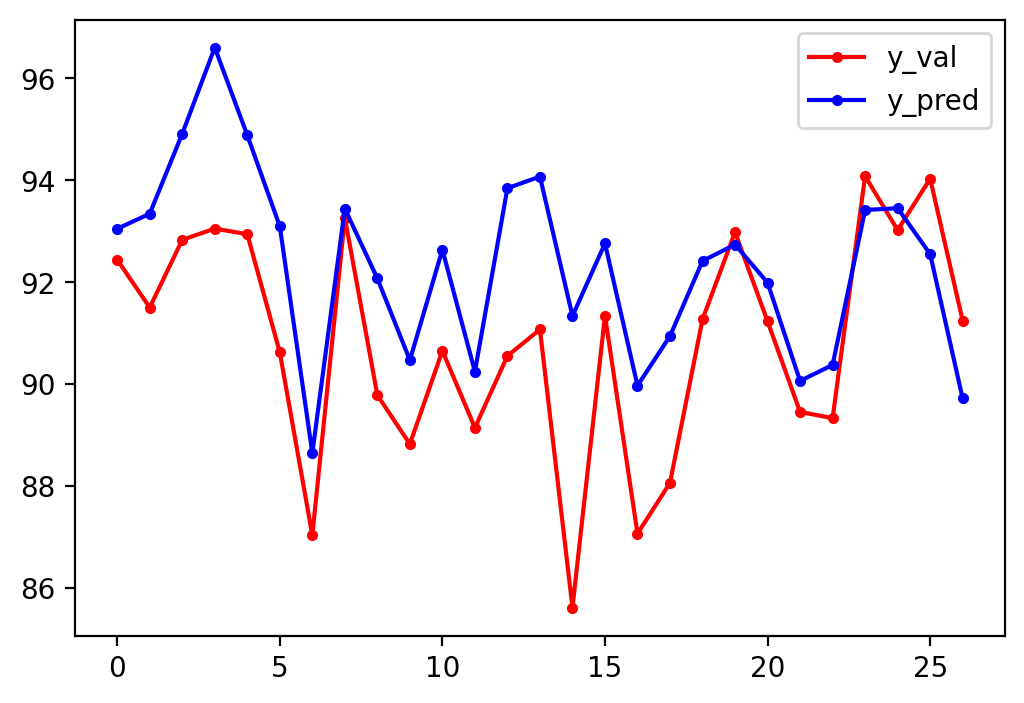

In [26]:
show_regression_result(y_val, y_pred, 1000)

In [27]:
# 가중치를 Horizontal Bar graph로 확인하는 함수
def plot_features_weights(features, weights):
    W = pd.DataFrame({'Weights':weights}, index=features) # 가중치 데이터를 df 형태로 저장
    W = W.sort_values(by='Weights', ascending=True) # 가중치 데이터를 오름 차순 정렬
    W.plot(kind='barh', figsize=(8, 6)) # 가중치 데이터 시각화

[2.7066423769099144, 2.1130364096077168, 0.2782022107503209, -1.5309950370434637, -3.4927940537272026, -4.256666527040552]


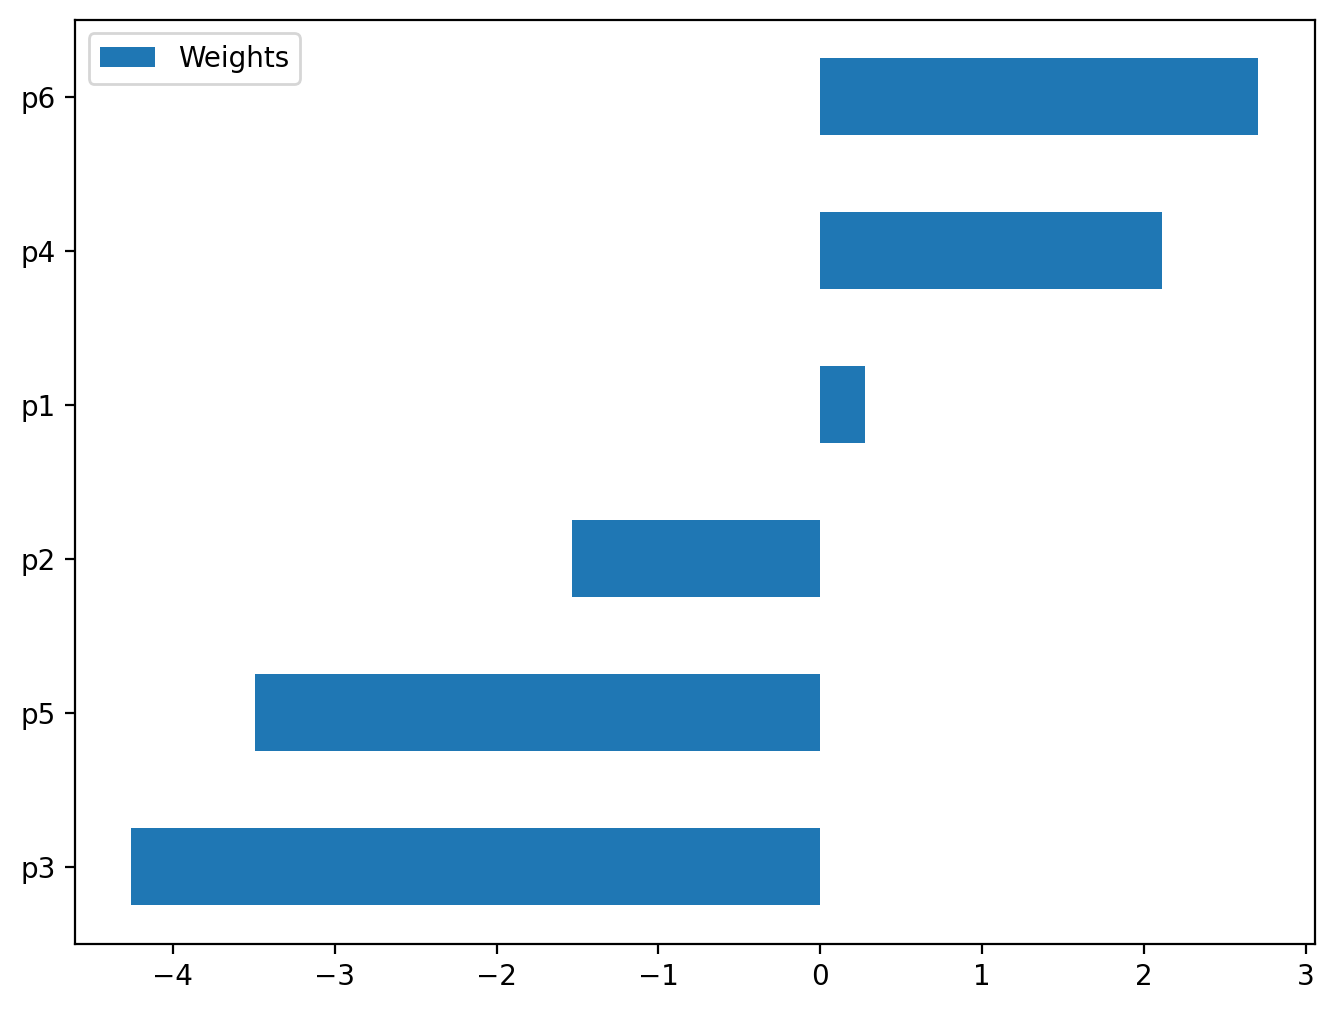

In [28]:
print(sorted(lin.coef_,reverse=True)) # 가중치 데이터 출력

plot_features_weights(X_train.columns, lin.coef_) # 함수 실행

#### 결정 트리 모델 (Decision Tree Model, DTM)

In [33]:
## 결정 트리를 이용한 이진 분류
# 트리의 깊이를 작게 선택하면 과소적합(under fitting)이 발생한다
# 트리의 깊이를 깊게 선택하면 과대적합(over fitting)이 발생한다
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor


# 최적 깊이를 찾기 위한 반복적인 fitting 실행
score_list = []
for depth in range(1,100):
    dtr = DecisionTreeRegressor(max_depth=depth)
    dtr.fit(X_train, y_train)
    print(depth, dtr.score(X_val, y_val).round(4))
    score_list.append(dtr.score(X_val, y_val).round(4))


# 확인된 최적 깊이와 그 때 fitting score 확인
opt_depth = score_list.index(max(score_list))+1
print(opt_depth, max(score_list))


1 -0.885
2 -0.6017
3 -0.5959
4 -0.5729
5 -0.3045
6 -0.6139
7 -0.1736
8 -0.175
9 -0.3265
10 -0.4452
11 -0.3652
12 -0.4354
13 -0.4969
14 -0.3278
15 -0.4312
16 -0.3253
17 -0.3683
18 -0.3262
19 -0.4625
20 -0.3326
21 -0.1917
22 -0.3289
23 -0.3244
24 -0.5052
25 -0.2306
26 -0.3963
27 -0.4542
28 -0.3218
29 -0.2693
30 -0.4078
31 -0.3648
32 -0.3246
33 -0.3971
34 -0.409
35 -0.3316
36 -0.37
37 -0.3789
38 -0.536
39 -0.4523
40 -0.3567
41 -0.174
42 -0.4016
43 -0.2946
44 -0.3882
45 -0.2944
46 -0.5313
47 -0.2611
48 -0.4895
49 -0.5311
50 -0.2564
51 -0.3941
52 -0.3307
53 -0.3847
54 -0.4886
55 -0.2865
56 -0.4977
57 -0.2648
58 -0.4004
59 -0.4052
60 -0.5041
61 -0.4347
62 -0.2662
63 -0.3874
64 -0.4651
65 -0.4567
66 -0.4321
67 -0.3235
68 -0.3673
69 -0.4888
70 -0.4542
71 -0.4147
72 -0.365
73 -0.4925
74 -0.2679
75 -0.4232
76 -0.4661
77 -0.3278
78 -0.4912
79 -0.2723
80 -0.2465
81 -0.4097
82 -0.3783
83 -0.3254
84 -0.2856
85 -0.3347
86 -0.4243
87 -0.2579
88 -0.4567
89 -0.3841
90 -0.4627
91 -0.4353
92 -0.4925
93 -0

In [35]:
# 최적의 깊이를 갖는 트리 모델

dtr = DecisionTreeRegressor(max_depth=opt_depth)
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_val)

MAE= 1.9086069023569001
rmse= 2.3704657923225207
max error= 5.959999999999994
R2= -0.17364441371452166


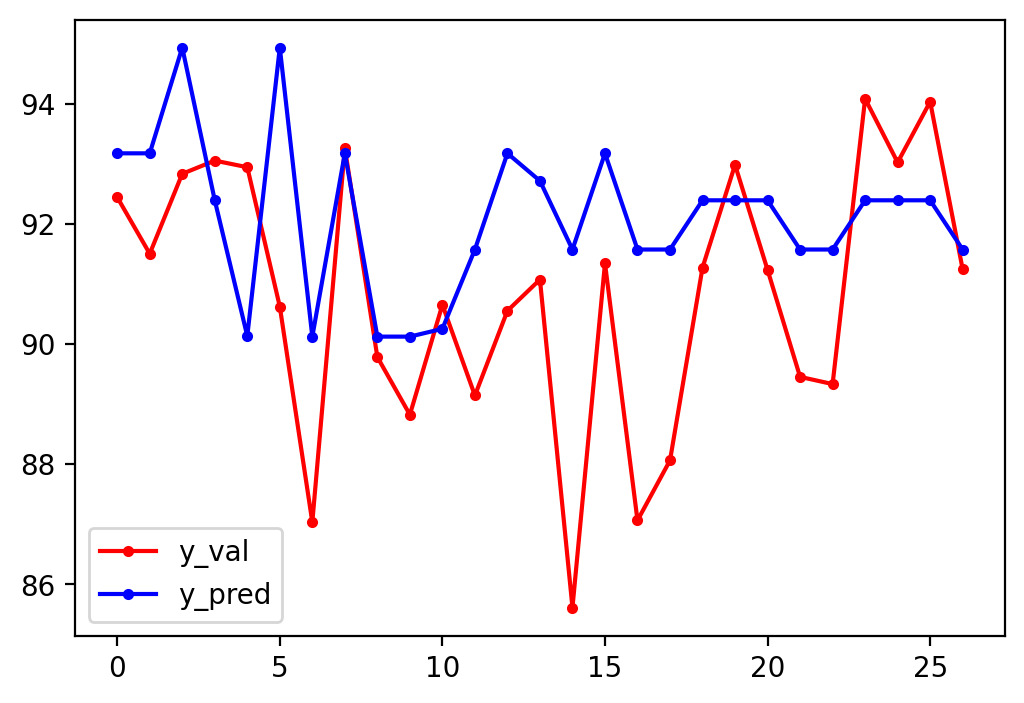

In [38]:
# 트리 모델 성능 평가
show_regression_result(y_val, y_pred, 1000)

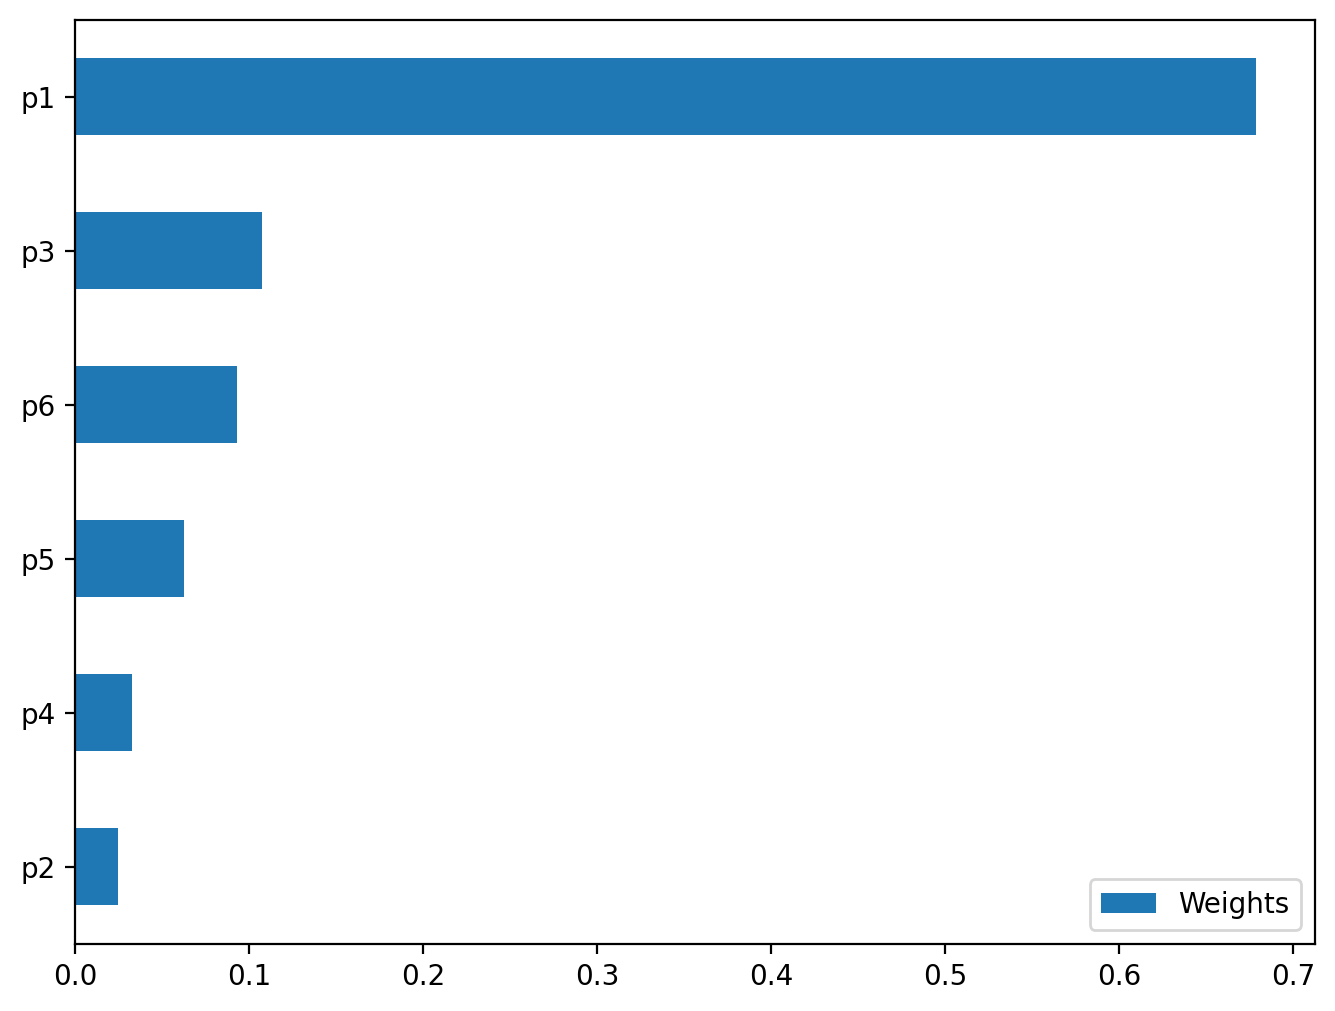

In [39]:
# 트리 모델 특성 중요도 보기
# 특성 중요도: 트리를 나눌때 순도를 높이는데(잘 분류하는데) 많이 기여한 정도를 알려준다

plot_features_weights(X_train.columns, dtr.feature_importances_)

#### 랜덤 포레스트 모델 (Random Forest Model, RFM)

- Random Forest Model은 Decision Forest Model의 성능을 개선한 앙상블 모델임
    - 앙상블 모델은 여러 개의 Training Data Set을 생성하여 Fitting을 함으로써 좀 더 정확한 예측을 도출하는 모델임
    - 이중 RFM은 이름과 같이 Forest 내에서 Tree를 랜덤하게 추출한 작은 Forest (데이터의 일부만 취한 새로운 Training Set, Weak Data)를 만들어 Fitting을 여러번 진행함

MAE= 1.892481481481496
rmse= 2.3974722577470464
max error= 6.478800000000035
R2= -0.20053916317181453


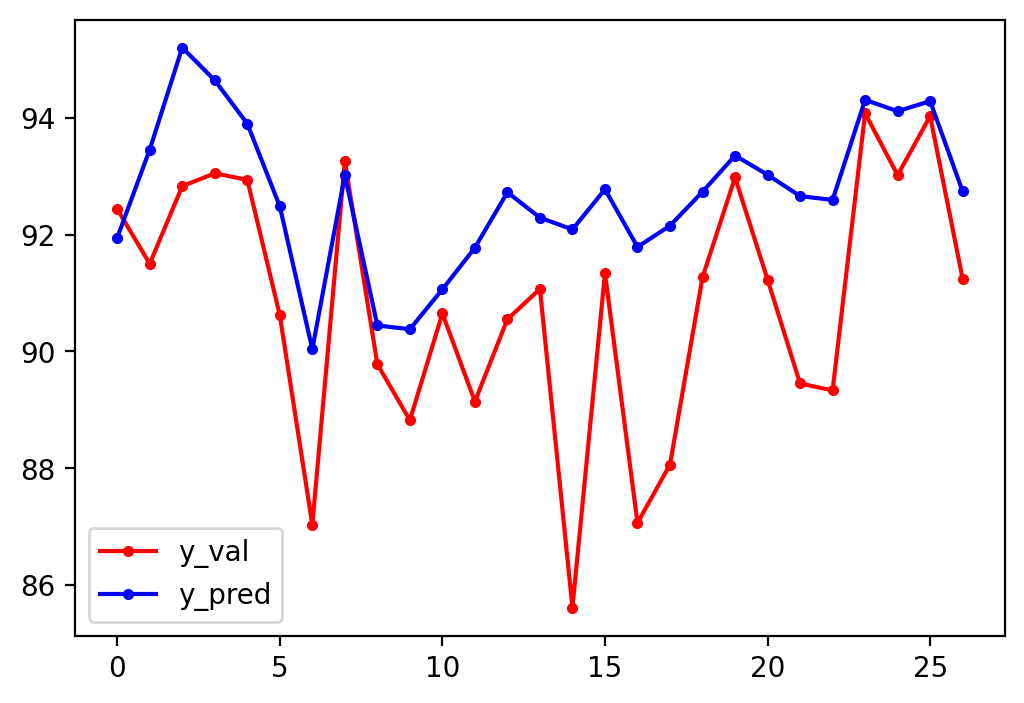

In [42]:
# RFM 호출
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
RFr = RandomForestRegressor()


# Training Set을 통한 RFM fitting 및 예측 결과값 (y_pred) 도출
RFr.fit(X_train,y_train)
y_pred = RFr.predict(X_val)


# 데이터 시각화
show_regression_result(y_val=y_val,y_pred=y_pred,N=1000)

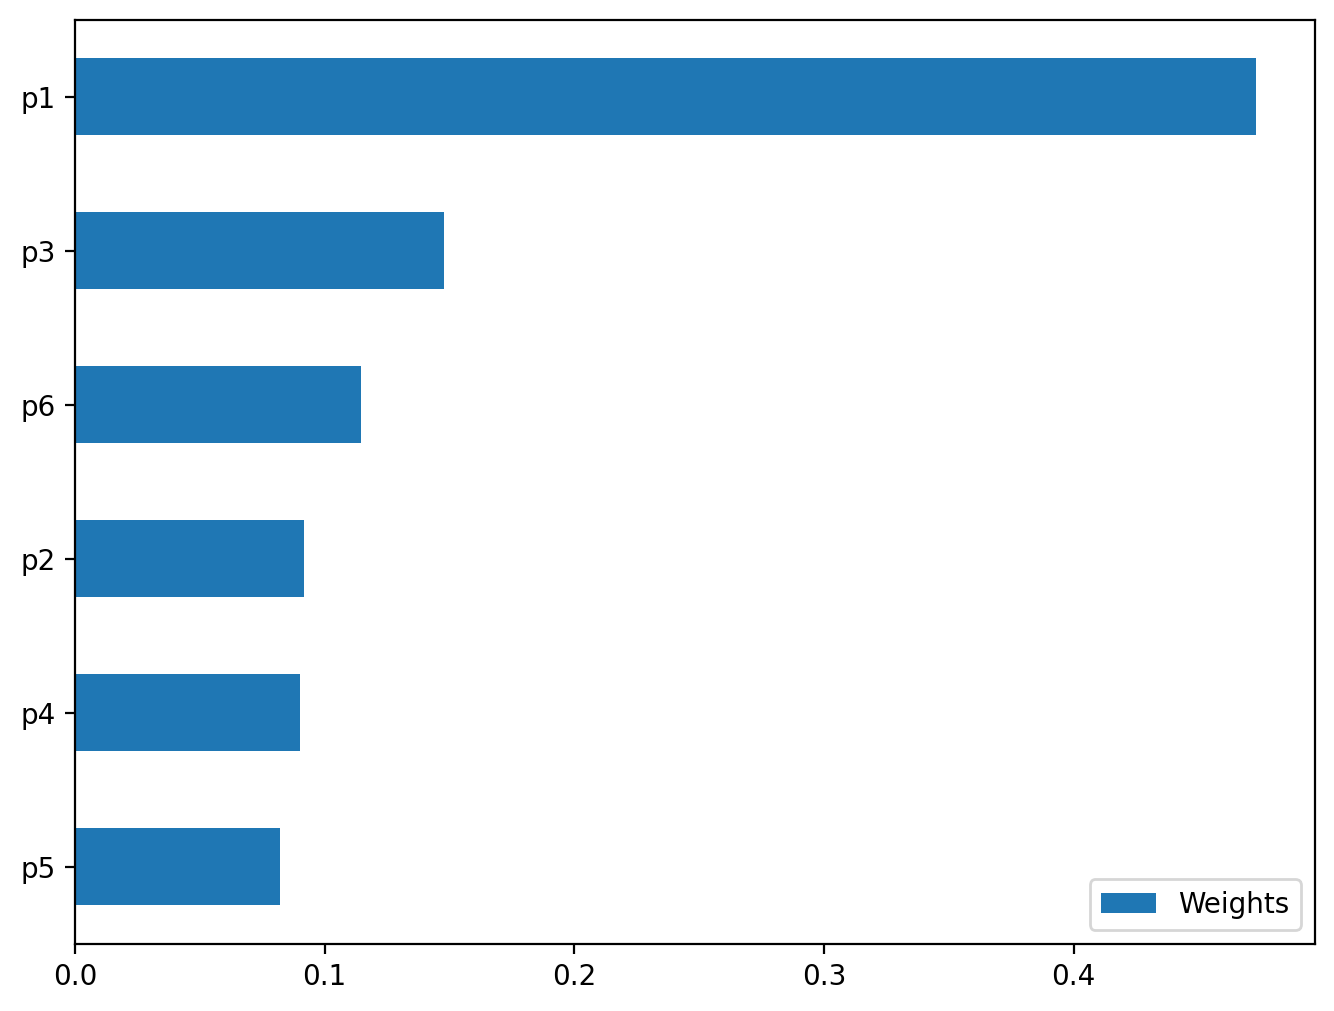

In [44]:
# 랜덤 포레스트 모델의 특성 중요도 보기
plot_features_weights(X_val.columns, RFr.feature_importances_)

#### 부스팅 모델 (Boosting Model, BM 또는 Boosting Algorithm, BA)
- Boosting Model은 Decision Forest Model의 성능을 개선한 앙상블 모델임
    - BM은 Forest 내에서 Tree를 순차적으로 추출한 작은 Forest (Weak Data)를 만들어 Fitting을 여러번 진행함

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000035 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 153
[LightGBM] [Info] Number of data points in the train set: 110, number of used features: 6
[LightGBM] [Info] Start training from score 91.889364
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

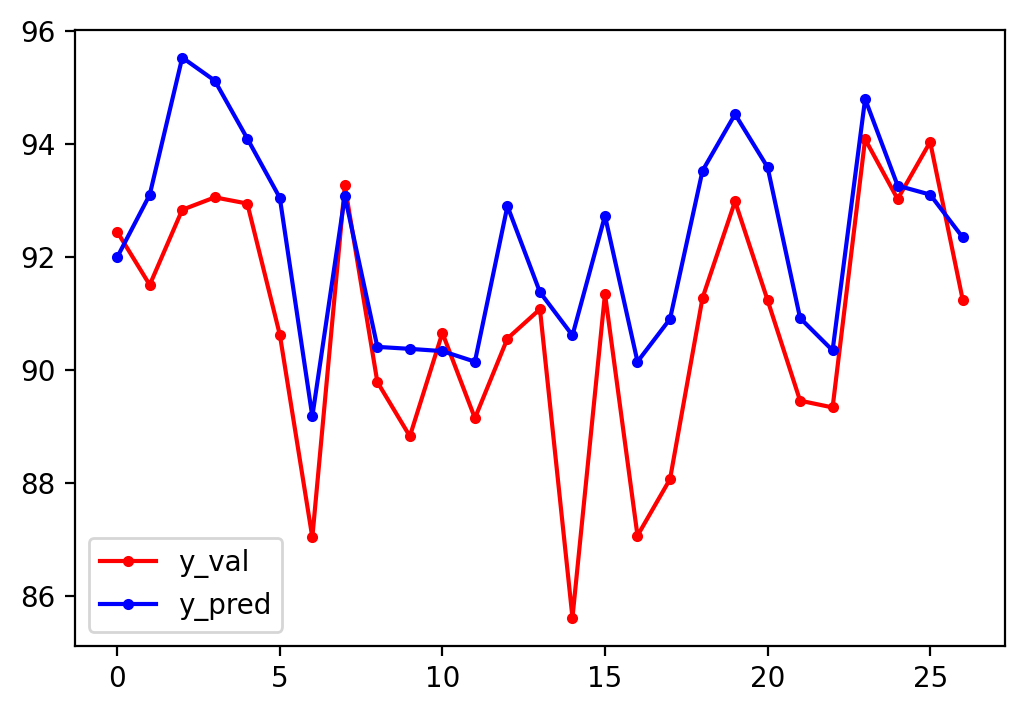

In [50]:
# Light Gradient BM(LGBM) 모듈 호출
from lightgbm import LGBMClassifier, LGBMRegressor
LGBMr = LGBMRegressor()


# Training Set을 통한 LGBM fitting 및 예측 결과값 (y_pred) 도출
LGBMr.fit(X_train,y_train)
y_pred = LGBMr.predict(X_val)


# 시각화
show_regression_result(y_val=y_val,y_pred=y_pred,N=1000)

#### 분류 모델

#### 신경망 모델 (Neural Network Model, NNM)
- 

##### 장단기 메모리 (Long Short Term Memory, LSTM) 
* 장단기 메모리 LSTM (Long Shrot Term Memory)은 신경망 모델 그 전에 사용되던 순환 신경망 모델 (Recurrent Neural Network, RNN)의 단점을 보완하여 설계된 신경망 구조
* 단순한 수학적 뇌 모델에 기초하는 예측 기법으로 Training Set의 훈련 데이터 (X_train)와 훈련 결과 (y_train) 사이의 비선형 관계를 다룰 수 있음
* LSTM 모델은 Samples - time Steps - Features 구조의 입력이 필요함

###### Sequence를 n_step의 크기로 나눠서 샘플을 만듦
- (주의) 해당 모델은 마지막 샘플은 포함하지 않음
- 현재 데이터로 현재를 예측하는 것이 맞는지는 응용에 따라서 점검해야 함 - ?????

In [1]:
def split_seq(sequence, n_steps):
    x = []
    for i in range(len(sequence) - n_steps):
        x.append(sequence[i:i + n_steps])
    return np.array(x)

In [4]:
x = np.arange(30).reshape(-1,3)
print(x)

inp=split_seq(x,4)
print("LSTM 모델 입력용 데이터:", inp.shape)

inp

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]
 [15 16 17]
 [18 19 20]
 [21 22 23]
 [24 25 26]
 [27 28 29]]
LSTM 모델 입력용 데이터: (6, 4, 3)


array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]],

       [[ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14]],

       [[ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17],
        [18, 19, 20]],

       [[12, 13, 14],
        [15, 16, 17],
        [18, 19, 20],
        [21, 22, 23]],

       [[15, 16, 17],
        [18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

###### 입력 시퀀스 (Input Sequence) 만들기

#### 회귀 모델 (Regression Model)